In [1]:
from src.data.make_dataset import make_cat_dict,calc_reactor_metrics
from src.models.constants import Constants
from src.models.util import generate_grid,split,EI,generate_prediction_array,GP_regressor
from src.models.gaussian_process import featurize

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import scipy.stats as ss

In [4]:
plt.style.use('seaborn-talk')
cmap = plt.get_cmap("tab10")

# 1) Assessing model performance 

Leave-one-out cross-validation for the various rounds.

Total data points:  26
Trained Kernel:  2.68**2 * RBF(length_scale=3.39)
Trained Kernel:  2.46**2 * RBF(length_scale=3.8)
Trained Kernel:  2.71**2 * RBF(length_scale=3.52)
Trained Kernel:  2.73**2 * RBF(length_scale=3.36)
Trained Kernel:  2.7**2 * RBF(length_scale=3.3)
Trained Kernel:  2.7**2 * RBF(length_scale=3.3)
Trained Kernel:  2.7**2 * RBF(length_scale=3.31)
Trained Kernel:  2.63**2 * RBF(length_scale=3.31)
Trained Kernel:  2.68**2 * RBF(length_scale=3.33)
Trained Kernel:  2.69**2 * RBF(length_scale=3.32)
Trained Kernel:  2.71**2 * RBF(length_scale=3.33)
Trained Kernel:  2.72**2 * RBF(length_scale=3.36)
Trained Kernel:  2.72**2 * RBF(length_scale=3.36)
Trained Kernel:  2.62**2 * RBF(length_scale=3.48)
Trained Kernel:  2.72**2 * RBF(length_scale=3.47)
Trained Kernel:  2.71**2 * RBF(length_scale=3.33)
Trained Kernel:  2.71**2 * RBF(length_scale=3.35)
Trained Kernel:  2.72**2 * RBF(length_scale=3.34)
Trained Kernel:  2.73**2 * RBF(length_scale=3.37)
Trained Kernel:  2.46**2 * RBF(le

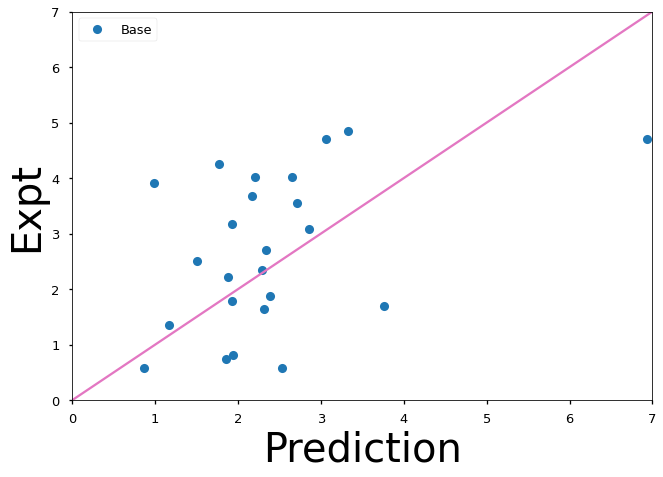

Total data points:  26
Trained Kernel:  2.68**2 * RBF(length_scale=3.39)
Trained Kernel:  2.46**2 * RBF(length_scale=3.8)
Trained Kernel:  2.71**2 * RBF(length_scale=3.52)
Trained Kernel:  2.73**2 * RBF(length_scale=3.36)
Trained Kernel:  2.7**2 * RBF(length_scale=3.3)
Trained Kernel:  2.7**2 * RBF(length_scale=3.3)
Trained Kernel:  2.7**2 * RBF(length_scale=3.31)
Trained Kernel:  2.63**2 * RBF(length_scale=3.31)
Trained Kernel:  2.68**2 * RBF(length_scale=3.33)
Trained Kernel:  2.69**2 * RBF(length_scale=3.32)
Trained Kernel:  2.71**2 * RBF(length_scale=3.33)
Trained Kernel:  2.72**2 * RBF(length_scale=3.36)
Trained Kernel:  2.72**2 * RBF(length_scale=3.36)
Trained Kernel:  2.62**2 * RBF(length_scale=3.48)
Trained Kernel:  2.72**2 * RBF(length_scale=3.47)
Trained Kernel:  2.71**2 * RBF(length_scale=3.33)
Trained Kernel:  2.71**2 * RBF(length_scale=3.35)
Trained Kernel:  2.72**2 * RBF(length_scale=3.34)
Trained Kernel:  2.73**2 * RBF(length_scale=3.37)
Trained Kernel:  2.46**2 * RBF(le

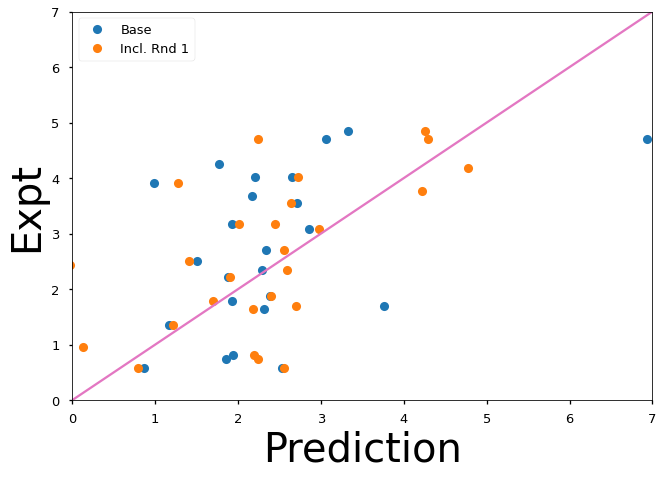

Total data points:  26
Trained Kernel:  2.68**2 * RBF(length_scale=3.39)
Trained Kernel:  2.46**2 * RBF(length_scale=3.8)
Trained Kernel:  2.71**2 * RBF(length_scale=3.52)
Trained Kernel:  2.73**2 * RBF(length_scale=3.36)
Trained Kernel:  2.7**2 * RBF(length_scale=3.3)
Trained Kernel:  2.7**2 * RBF(length_scale=3.3)
Trained Kernel:  2.7**2 * RBF(length_scale=3.31)
Trained Kernel:  2.63**2 * RBF(length_scale=3.31)
Trained Kernel:  2.68**2 * RBF(length_scale=3.33)
Trained Kernel:  2.69**2 * RBF(length_scale=3.32)
Trained Kernel:  2.71**2 * RBF(length_scale=3.33)
Trained Kernel:  2.72**2 * RBF(length_scale=3.36)
Trained Kernel:  2.72**2 * RBF(length_scale=3.36)
Trained Kernel:  2.62**2 * RBF(length_scale=3.48)
Trained Kernel:  2.72**2 * RBF(length_scale=3.47)
Trained Kernel:  2.71**2 * RBF(length_scale=3.33)
Trained Kernel:  2.71**2 * RBF(length_scale=3.35)
Trained Kernel:  2.72**2 * RBF(length_scale=3.34)
Trained Kernel:  2.73**2 * RBF(length_scale=3.37)
Trained Kernel:  2.46**2 * RBF(le

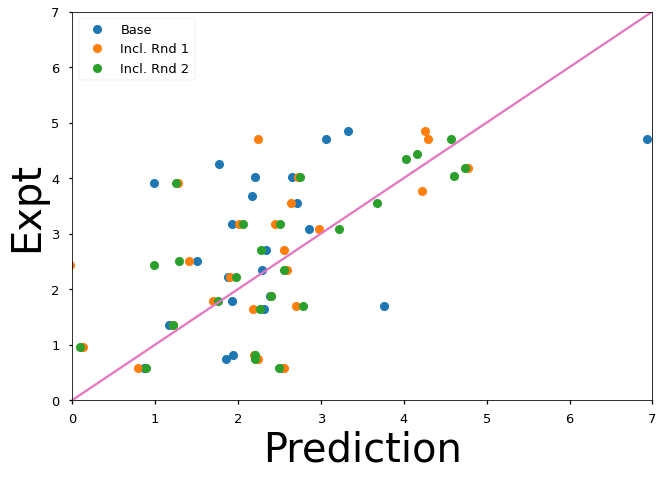

Average MAE: 1.11 RMSE: 1.29 R2: 0.0


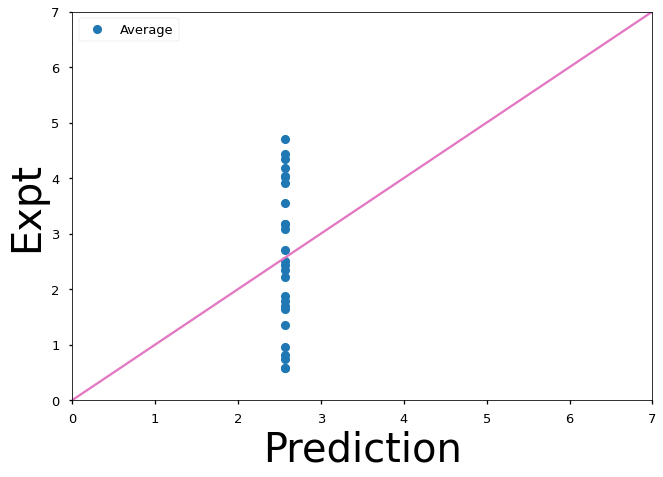

In [6]:
#load in reactor data
raw_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/raw"
processed_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/processed"
n_map = {1:"Base",2:"Incl. Rnd 1",3:"Incl. Rnd 2",4:"Incld. Rnd 3"}
for m in range(2,6):
    for n in range(1,m,1):
        fname = f'3-averaged_Round{n}-Standardized.csv'
        f = processed_dir+"/"+fname
        df = pd.read_csv(f,index_col=0)
        df_features,df_targets = featurize(df)
        X = df_features.to_numpy()
        y = df_targets[['sqrtY0Y_pc','sqrtY0Y_pc_sd']].to_numpy()
        print("Total data points: ",len(df_features))
        loo = LeaveOneOut().split(X,y=y)
        results = []
        for i, (i_train,i_test) in enumerate(loo):
            mu,sigma = GP_regressor(X[i_train],y[i_train],X[i_test])
            results.append((i_test,y[i_test,0],mu,sigma))
        

        if n == 1:
            expt=np.asarray([tup[1] for tup in results])[:,0]
            pred=np.asarray([tup[2] for tup in results])[:,0]
        else:
            expt=np.asarray([tup[1] for tup in results])[:-(n-1)*6,0]
            pred=np.asarray([tup[2] for tup in results])[:-(n-1)*6,0]
        print("Total tested points: ",len(expt))
        mae = np.mean(np.abs(pred-expt))
        slope, intercept, r_value, p_value, std_err = ss.linregress(expt,pred)
        r2 = r_value**2
        rmse = np.sqrt(mean_squared_error(expt,pred))
        label=f'Round {n} GP MAE: {mae:.3} RMSE: {rmse:.3} R2: {r2:.3}'
        print(label)
        plt.plot(pred,expt,'o',label=f'{n_map[n]}')
    parity = [0,7]
    plt.plot(parity,parity,linestyle='-',color=cmap(6))
    plt.ylabel("Expt",fontsize=40)
    plt.xlabel("Prediction",fontsize=40)
    plt.xlim((0,7))
    plt.ylim((0,7))
    plt.legend()
    plt.savefig(f'./figures/GP-LOO-parity-rnd0-{n}.png',dpi=300,bbox_inches="tight")
    plt.show()   
    
    
avg = np.asarray([np.average(expt) for i in range(len(expt))])
mae = np.mean(np.abs(avg-expt))
slope, intercept, r_value, p_value, std_err = ss.linregress(expt,avg)
r2 = r_value**2
rmse = np.sqrt(mean_squared_error(expt,avg))
label=f'Average MAE: {mae:.3} RMSE: {rmse:.3} R2: {r2:.3}'
print(label)
plt.plot(avg,expt,'o',label=f'Average')
parity = [0,7]
plt.plot(parity,parity,linestyle='-',color=cmap(6))
plt.ylabel("Expt",fontsize=40)
plt.xlabel("Prediction",fontsize=40)
plt.xlim((0,7))
plt.ylim((0,7))
plt.legend()
plt.savefig(f'./figures/GP-LOO-parity-average.png',dpi=300,bbox_inches="tight")
plt.show()   
    
# df = pd.read_csv(processed_dir+"/"+fname,index_col=0)
# df.head()

In [59]:
avg = np.asarray([np.average(expt) for i in range(len(expt))])
mae = np.mean(np.abs(avg-expt))
slope, intercept, r_value, p_value, std_err = ss.linregress(expt,avg)
r2 = r_value**2
rmse = np.sqrt(mean_squared_error(expt,avg))
label=f'Average MAE: {mae:.3} RMSE: {rmse:.3} R2: {r2:.3}'
print(label)

Average MAE: 1.17 RMSE: 1.35 R2: 0.0


Total data points:  26
Trained Kernel:  2.68**2 * RBF(length_scale=3.39)
Trained Kernel:  2.46**2 * RBF(length_scale=3.8)
Trained Kernel:  2.71**2 * RBF(length_scale=3.52)
Trained Kernel:  2.73**2 * RBF(length_scale=3.36)
Trained Kernel:  2.7**2 * RBF(length_scale=3.3)
Trained Kernel:  2.7**2 * RBF(length_scale=3.3)
Trained Kernel:  2.7**2 * RBF(length_scale=3.31)
Trained Kernel:  2.63**2 * RBF(length_scale=3.31)
Trained Kernel:  2.68**2 * RBF(length_scale=3.33)
Trained Kernel:  2.69**2 * RBF(length_scale=3.32)
Trained Kernel:  2.71**2 * RBF(length_scale=3.33)
Trained Kernel:  2.72**2 * RBF(length_scale=3.36)
Trained Kernel:  2.72**2 * RBF(length_scale=3.36)
Trained Kernel:  2.62**2 * RBF(length_scale=3.48)
Trained Kernel:  2.72**2 * RBF(length_scale=3.47)
Trained Kernel:  2.71**2 * RBF(length_scale=3.33)
Trained Kernel:  2.71**2 * RBF(length_scale=3.35)
Trained Kernel:  2.72**2 * RBF(length_scale=3.34)
Trained Kernel:  2.73**2 * RBF(length_scale=3.37)
Trained Kernel:  2.46**2 * RBF(le

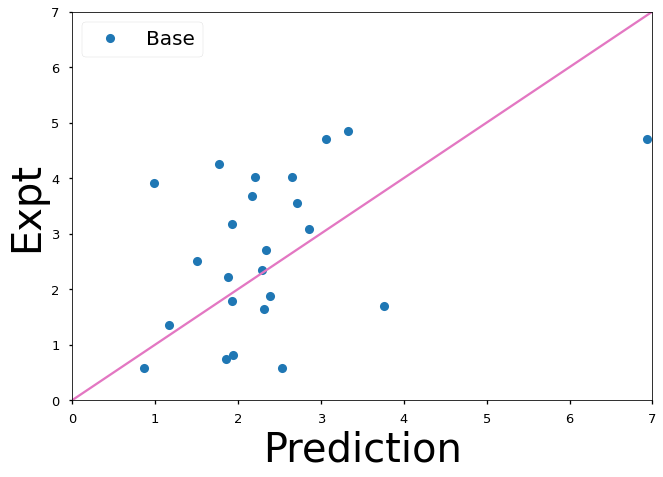

Total data points:  32
Trained Kernel:  2.65**2 * RBF(length_scale=3.61)
Trained Kernel:  2.46**2 * RBF(length_scale=3.51)
Trained Kernel:  2.65**2 * RBF(length_scale=3.36)
Trained Kernel:  2.68**2 * RBF(length_scale=3.3)
Trained Kernel:  2.65**2 * RBF(length_scale=3.27)
Trained Kernel:  2.66**2 * RBF(length_scale=3.27)
Trained Kernel:  2.65**2 * RBF(length_scale=3.27)
Trained Kernel:  2.59**2 * RBF(length_scale=3.24)
Trained Kernel:  2.64**2 * RBF(length_scale=3.28)
Trained Kernel:  2.64**2 * RBF(length_scale=3.27)
Trained Kernel:  2.67**2 * RBF(length_scale=3.29)
Trained Kernel:  2.68**2 * RBF(length_scale=3.3)
Trained Kernel:  2.68**2 * RBF(length_scale=3.31)
Trained Kernel:  2.56**2 * RBF(length_scale=3.62)
Trained Kernel:  2.67**2 * RBF(length_scale=3.31)
Trained Kernel:  2.67**2 * RBF(length_scale=3.29)
Trained Kernel:  2.67**2 * RBF(length_scale=3.32)
Trained Kernel:  2.68**2 * RBF(length_scale=3.3)
Trained Kernel:  2.68**2 * RBF(length_scale=3.31)
Trained Kernel:  2.46**2 * RBF

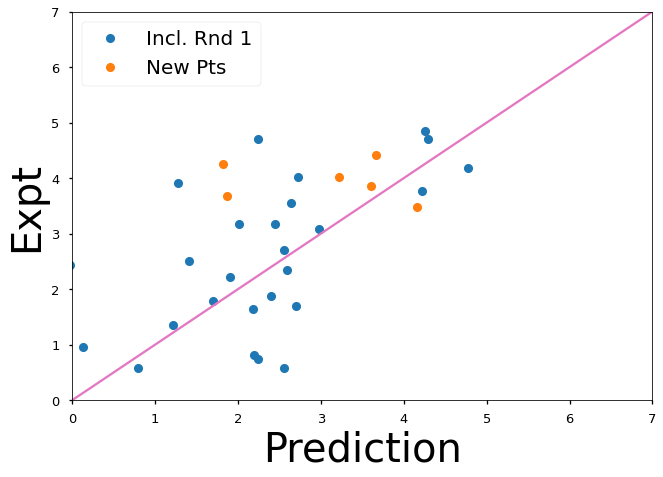

Total data points:  38
Trained Kernel:  2.52**2 * RBF(length_scale=3.62)
Trained Kernel:  2.33**2 * RBF(length_scale=3.55)
Trained Kernel:  2.5**2 * RBF(length_scale=3.39)
Trained Kernel:  2.55**2 * RBF(length_scale=3.38)
Trained Kernel:  2.52**2 * RBF(length_scale=3.35)
Trained Kernel:  2.54**2 * RBF(length_scale=3.36)
Trained Kernel:  2.54**2 * RBF(length_scale=3.37)
Trained Kernel:  2.46**2 * RBF(length_scale=3.33)
Trained Kernel:  2.52**2 * RBF(length_scale=3.37)
Trained Kernel:  2.52**2 * RBF(length_scale=3.36)
Trained Kernel:  2.53**2 * RBF(length_scale=3.36)
Trained Kernel:  2.55**2 * RBF(length_scale=3.38)
Trained Kernel:  2.55**2 * RBF(length_scale=3.39)
Trained Kernel:  2.4**2 * RBF(length_scale=3.57)
Trained Kernel:  2.55**2 * RBF(length_scale=3.4)
Trained Kernel:  2.55**2 * RBF(length_scale=3.38)
Trained Kernel:  2.55**2 * RBF(length_scale=3.39)
Trained Kernel:  2.55**2 * RBF(length_scale=3.38)
Trained Kernel:  2.55**2 * RBF(length_scale=3.39)
Trained Kernel:  2.33**2 * RBF

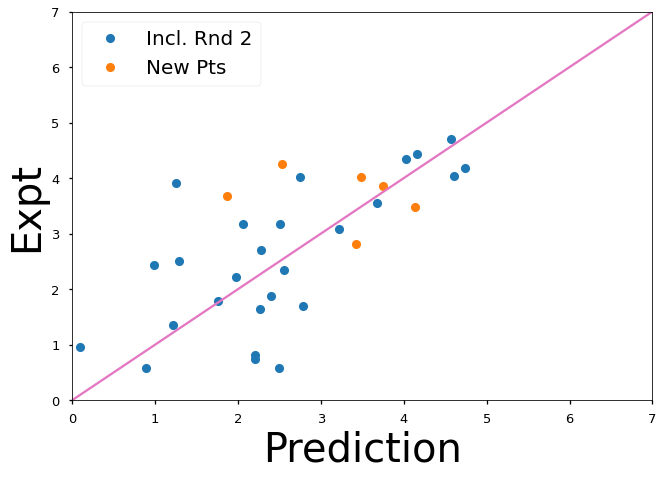

Total data points:  44
Trained Kernel:  2.54**2 * RBF(length_scale=3.29)
Trained Kernel:  2.41**2 * RBF(length_scale=3.25)
Trained Kernel:  2.53**2 * RBF(length_scale=3.17)
Trained Kernel:  2.57**2 * RBF(length_scale=3.17)
Trained Kernel:  2.55**2 * RBF(length_scale=3.14)
Trained Kernel:  2.57**2 * RBF(length_scale=3.17)
Trained Kernel:  2.58**2 * RBF(length_scale=3.18)
Trained Kernel:  2.47**2 * RBF(length_scale=3.26)
Trained Kernel:  2.55**2 * RBF(length_scale=3.16)
Trained Kernel:  2.55**2 * RBF(length_scale=3.16)
Trained Kernel:  2.56**2 * RBF(length_scale=3.16)
Trained Kernel:  2.58**2 * RBF(length_scale=3.18)
Trained Kernel:  2.58**2 * RBF(length_scale=3.18)
Trained Kernel:  2.46**2 * RBF(length_scale=3.24)
Trained Kernel:  2.58**2 * RBF(length_scale=3.19)
Trained Kernel:  2.57**2 * RBF(length_scale=3.16)
Trained Kernel:  2.58**2 * RBF(length_scale=3.19)
Trained Kernel:  2.57**2 * RBF(length_scale=3.17)
Trained Kernel:  2.58**2 * RBF(length_scale=3.18)
Trained Kernel:  2.4**2 * R

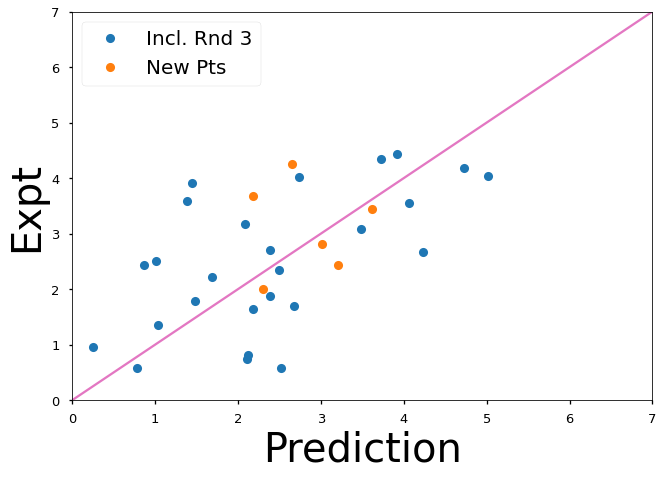

In [5]:
#load in reactor data
raw_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/raw"
processed_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/processed"
n_map = {1:"Base",2:"Incl. Rnd 1",3:"Incl. Rnd 2",4:"Incl. Rnd 3"}

for n in range(1,5,1):
    fname = f'3-averaged_Round{n}-Standardized.csv'
    f = processed_dir+"/"+fname
    df = pd.read_csv(f,index_col=0)
    df_features,df_targets = featurize(df)
    X = df_features.to_numpy()
    y = df_targets[['sqrtY0Y_pc','sqrtY0Y_pc_sd']].to_numpy()
    print("Total data points: ",len(df_features))
    loo = LeaveOneOut().split(X,y=y)
    results = []
    for i, (i_train,i_test) in enumerate(loo):
        mu,sigma = GP_regressor(X[i_train],y[i_train],X[i_test])
        results.append((i_test,y[i_test,0],mu,sigma))

    all_expt = np.asarray([tup[1] for tup in results])
    all_pred = np.asarray([tup[2] for tup in results])
    
    if n == 1:
        expt=all_expt[:,0]
        pred=all_pred[:,0]
    else:
        expt=all_expt[:-(n-1)*6,0]
        pred=all_pred[:-(n-1)*6,0]
        new_expt=all_expt[-6:] #separate out new points
        new_pred = all_pred[-6:] #separate out new points
    print("Total tested points: ",len(expt))
    mae = np.mean(np.abs(pred-expt))
    slope, intercept, r_value, p_value, std_err = ss.linregress(expt,pred)
    r2 = r_value**2
    rmse = np.sqrt(mean_squared_error(expt,pred))
    label=f'Round {n} GP MAE: {mae:.3} RMSE: {rmse:.3} R2: {r2:.3}'
    print(label)
    plt.plot(pred,expt,'o',label=f'{n_map[n]}')
    if n != 1:
        plt.plot(new_pred,new_expt,'o',label="New Pts")
    parity = [0,7]
    plt.plot(parity,parity,linestyle='-',color=cmap(6))
    plt.ylabel("Expt",fontsize=40)
    plt.xlabel("Prediction",fontsize=40)
    plt.xlim((0,7))
    plt.ylim((0,7))
    plt.legend(fontsize=20)
#    plt.savefig(f'./figures/GP-LOO-parity-rnd{n}.png',dpi=300,bbox_inches="tight")
    plt.show()   
    

    
# df = pd.read_csv(processed_dir+"/"+fname,index_col=0)
# df.head()

Next we generate plots for each bimetallic.